## DBSCan clustering to identify outliers
Looking now at our Jupyter notebook, it's coming preloaded with the libraries you'll need. Those include pandas, Matplotlib, Seaborn, and scikit-learn. I've also given you the parameters for Matplotlib's data visualization and your Jupyter notebook is coming preloaded with the data that you need. 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style("whitegrid")

### DBSCan clustering to identify outliers
#### Train your model and identify outliers


In [3]:
df = pd.read_csv('../data/iris.data.csv', header=None, sep=',')

df.columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']
data = df.iloc[:, 0:4].values
target = df.iloc[:, 4].values
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(eps=0.8, min_samples=19)


In [5]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))
print(outliers_df[model.labels_ == -1])

Counter({np.int64(1): 94, np.int64(0): 50, np.int64(-1): 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


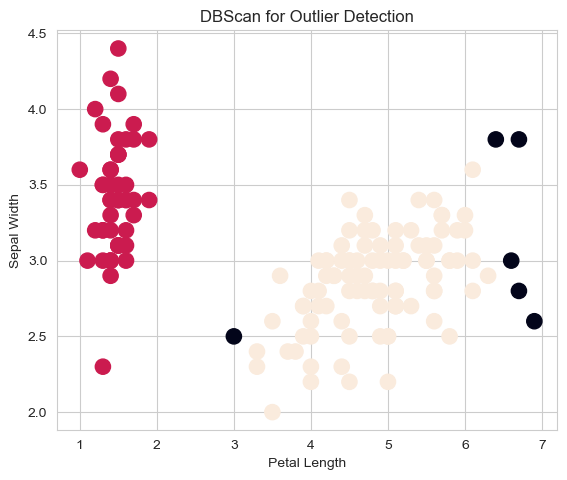

In [6]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(data[:, 2], data[:, 1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBScan for Outlier Detection')
plt.show()